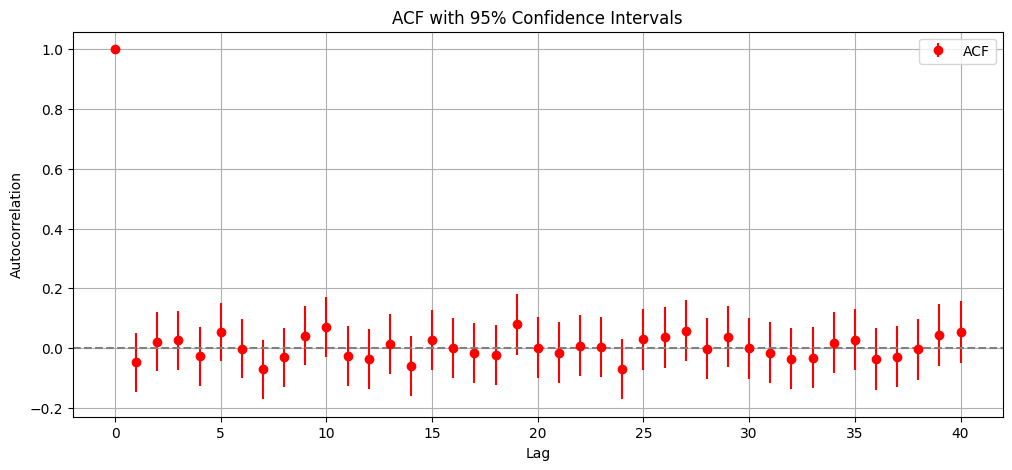

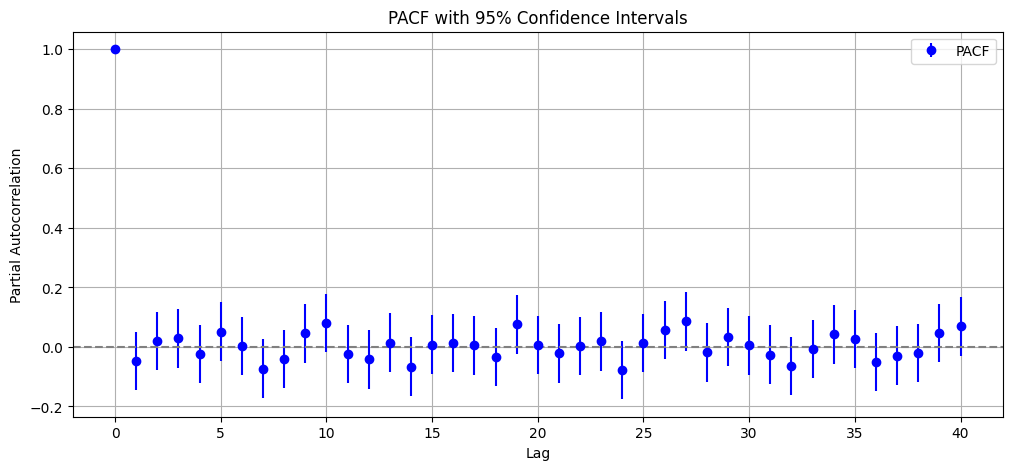

In [4]:
from statsmodels.tsa.stattools import acf, pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load Data ===
prices = pd.read_csv("./data/formatted_prices.csv")
prices["dates"] = pd.to_datetime(prices["dates"])
prices.set_index("dates", inplace=True)

# First 50 stocks
train_prices = prices.iloc[:400, :50]
returns = train_prices.pct_change().dropna()
nlags = 40
X = returns.iloc[:, 10]  # choose a specific stock

# === ACF with confidence intervals ===
X_acf, confint_acf = acf(X, nlags=nlags, alpha=0.05)
acf_errors = confint_acf[:, 1] - X_acf

# === PACF with confidence intervals ===
X_pacf, confint_pacf = pacf(X, nlags=nlags, alpha=0.05)
pacf_errors = confint_pacf[:, 1] - X_pacf

# === Plot ACF ===
plt.figure(figsize=(12, 5))
plt.errorbar(range(len(X_acf)), X_acf, yerr=acf_errors, fmt='ro', label="ACF")
plt.axhline(y=0, linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title("ACF with 95% Confidence Intervals")
plt.grid(True)
plt.legend()
plt.show()

# === Plot PACF ===
plt.figure(figsize=(12, 5))
plt.errorbar(range(len(X_pacf)), X_pacf, yerr=pacf_errors, fmt='bo', label="PACF")
plt.axhline(y=0, linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title("PACF with 95% Confidence Intervals")
plt.grid(True)
plt.legend()
plt.show()
